## Task 4 - To Explore Decision Tree Algorithm
- ## For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visual representation of model output

from sklearn.model_selection import train_test_split  # to split the data as train and test data sets
from sklearn import metrics # for calculating the accuracy of the model
from sklearn.metrics import confusion_matrix # for understanding the miscalculations in class
from sklearn.tree import DecisionTreeClassifier # for training the model using Decision tree Classifier
from sklearn import tree # for visual representation of model output in a tree structure

### UNDERSTANDING DATASET
- ### The data contains flower Sepal and Petal dimensions and the species to which the flower belongs to (target variable).
- ### There are 150 entries and 4 features.

In [2]:
# Creating a dataframe from the inbulit dataset iris

from sklearn import datasets
iris=datasets.load_iris()

### FEATURE ANALYSIS & SELECTION
- ### The independent features which can be used in training are SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.
- ### There are no Null values; no need of imputation or deletion of data.
- ### The dependent feature which is the target variable is the species to which flower belongs to.

In [3]:
# Independent variables or features 

X_iris_data=pd.DataFrame(iris.data, columns=iris.feature_names)
X_iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X_iris_data.shape

(150, 4)

In [5]:
# Dependent variable or Target feature

Y_iris_data=iris.target
print(Y_iris_data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
X_iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### MODEL BUILDING,TRAINING & PREDICTION

### TRIAL MODELS
- ### Model building & training using Decision Tree Algorithm for this classification and understanding the algorithm
    - ### Spliting the dataset into Training & Testing data and observe the accuracy of the model.
    - ### Decision Tree algorithms generally have a problem of overfitting with training data.
    - ### Decision Tree Algorithm uses various criterions to measure the homogeneity of a node.Criterion 'gini' is used by default.

### SPLITTING

In [7]:
# Spliting the dataset in the ratio -> train:test = 70:30

x_train,x_test,y_train,y_test=train_test_split(X_iris_data,Y_iris_data,test_size=0.3,random_state=0,stratify=Y_iris_data)

In [8]:
# For checking the distribution in the training dataset

y_train=pd.Series(y_train)
y_train.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
dtype: float64

### MODEL 1

### TRAINING 

In [9]:
# Training the Model with default parameters

dtree_clf1=DecisionTreeClassifier()
dtree_clf1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### VISUALISATION

In [10]:
# The list of column names

columns_list=list(X_iris_data.columns.values)
columns_list

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

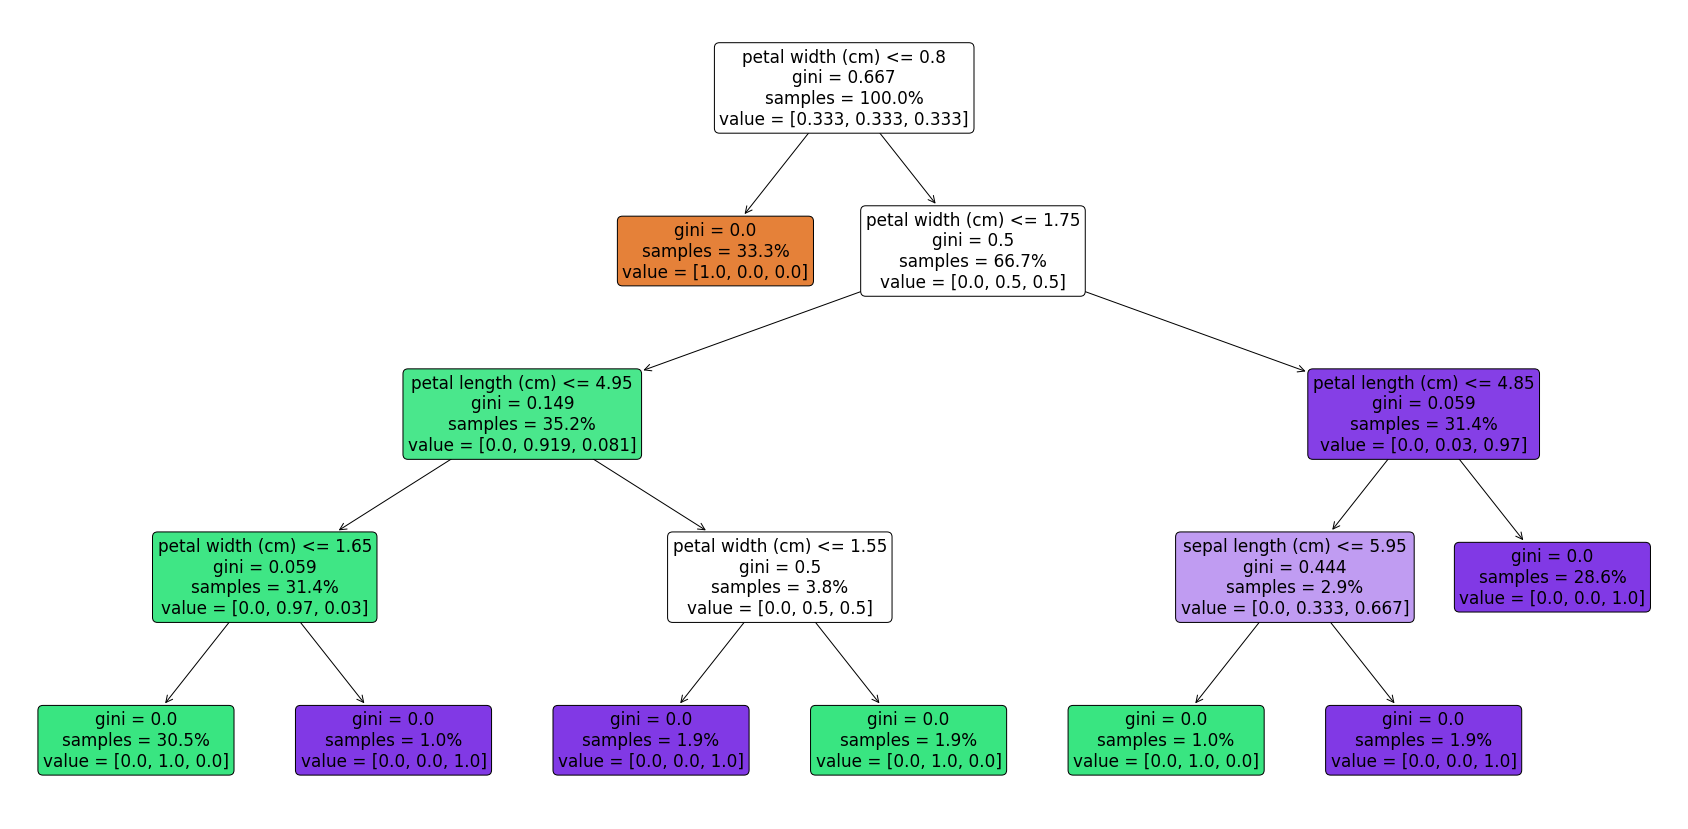

In [11]:
# Visual representation of model output in a tree structure

plt.figure(figsize=(30,15))
tree.plot_tree(dtree_clf1,feature_names=columns_list,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

### The above tree has a depth of 4, 6 decision nodes and 6 leaf nodes.

### PREDICTION

In [12]:
y_pred1=dtree_clf1.predict(x_test)

In [13]:
#Accuracy score of model with training data

dtree_clf1.score(x_train,y_train)

1.0

In [14]:
#Accuracy score of model with test data

dtree_clf1.score(x_test,y_test)

0.9777777777777777

### The accuracy score is 100% with the training dataset and in case of testing it is only 95.56%. This shows the overfitting problem of Decision Tree Algorithm.

In [15]:
#Understanding Misclassification

cm=confusion_matrix(y_test,y_pred1)
cm

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

### From the confusion matrix, it can be observed that there exists 2 misclassifications in prediction.

### MODEL 2
- ### Prunning the tree with parameters(max_depth,max_leaf_nodes) to reduce the difference in accuracy score of test and train.

### TRAINING

In [16]:
dtree_clf2=DecisionTreeClassifier(splitter='best',max_depth=4,max_leaf_nodes=6)
dtree_clf2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### VISUALISATION


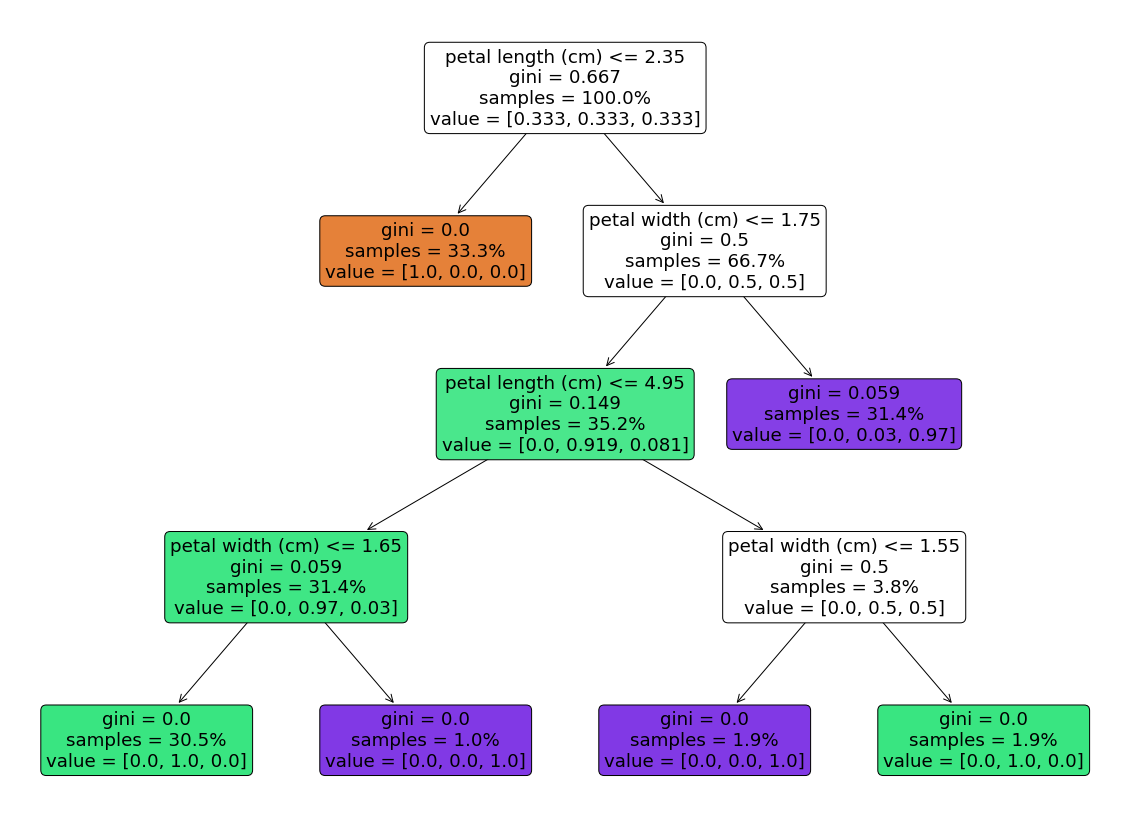

In [17]:
# Visual representation of model output in a tree structure

plt.figure(figsize=(20,15))
tree.plot_tree(dtree_clf2,feature_names=columns_list,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

### The above tree has a depth of 4, 4 decision nodes and 5 leaf nodes.

### PREDICTION

In [18]:
y_pred2=dtree_clf2.predict(x_test)

In [19]:
dtree_clf2.score(x_train,y_train)

0.9904761904761905

In [20]:
dtree_clf2.score(x_test,y_test)

0.9777777777777777

### The accuracy score is 99% with the training dataset and in case of testing it is only 97.78%. This shows the overfitting problem of Decision Tree Algorithm.

In [21]:
#Understanding Misclassification

cm=confusion_matrix(y_test,y_pred2)
cm

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

### From the confusion matrix, it can be observed that there exists 1 misclassification in prediction.

### FINAL MODEL
- ### Model building & training using Decision Tree Algorithm for this classification problem statement
    - ### Decision Tree is built with the entire data as training dataset.Predictions can be made with any new unknown dataset.
    - ### Prunning the tree with parameters(max_depth,max_leaf_nodes) to avoid overfitting problem.

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### TRAINING

In [23]:
#Restricting the depth of the tree to 4 and maximum leaf nodes as 6

dtree_clf=DecisionTreeClassifier(splitter='best',max_depth=4,max_leaf_nodes=6)
dtree_clf.fit(X_iris_data,Y_iris_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
#Accuracy score of model with training data

dtree_clf.score(X_iris_data,Y_iris_data)

0.9866666666666667

### The accuracy score of the model is 98.67% with the training dataset.

### VISUALISATION

- ### For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

(0.0, 7.88, -0.9, 3.4800000000000044)

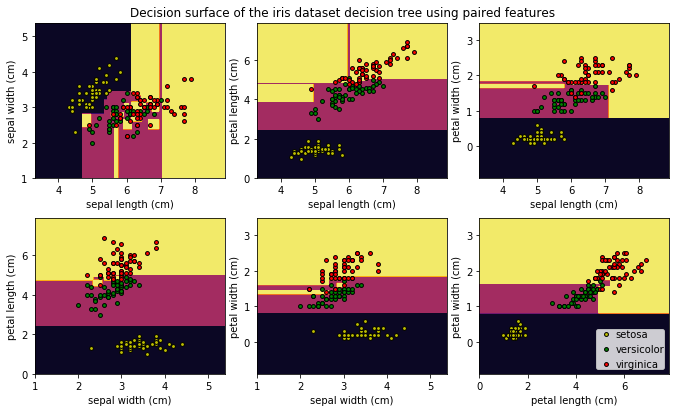

In [25]:
from sklearn.tree import plot_tree

# Parameters
n_classes = 3
plot_colors = "ygr"
plot_step = 0.02

plt.figure(figsize=(10,6))   
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
# We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap='inferno')

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                     edgecolor='black', s=15)
        
plt.suptitle("Decision surface of the iris dataset decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

### From the above graphs, it can be observed that :
- ### The decision surface for setosa is very clear and distinct, whereas that of versicolor and virginica is very subtle and seems to be overlapping at places; this shows that there may be more similarities in the dimension of these two species when compared with sentosa.
- ### There may be a possilibity of misclassification in case of versicolor and virginica.

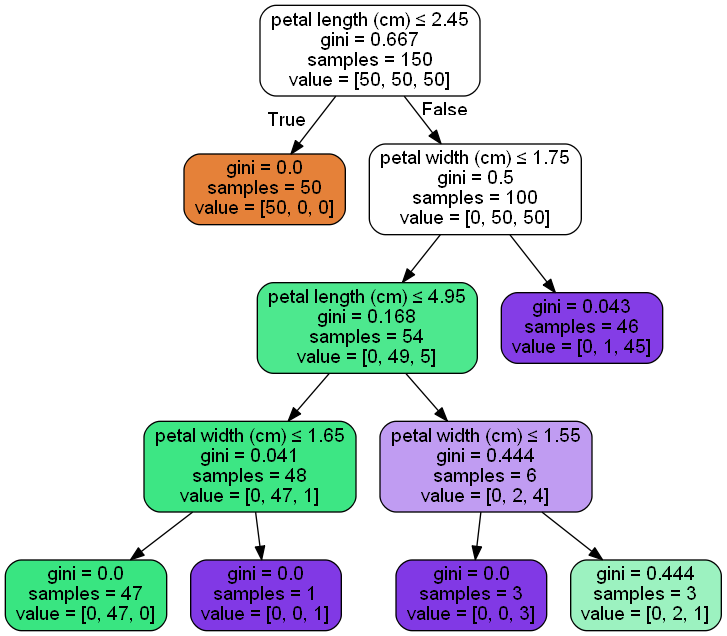

In [26]:
# Visual representation of model output in a tree structure

import os     
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

dot_data = StringIO()
tree.export_graphviz(dtree_clf, out_file=dot_data, feature_names=columns_list,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

### The above tree has a depth of 4, 4 decision nodes and 5 leaf nodes.

### INFERENCE
 - ### Trial Models were built to understand the Decision Tree Algorithm.Overfitting problem with training data and eventually the misclassification was observed.Prunning led to decrease in difference in accuracy with train and test data.
 - ### Final model was built as per the probem statement and can be used for predicting the classifcation for new data.The parameters for prunning based on the results of trial models is chosen.The accuracy score of the model is 98.67% with the training dataset.